In [1]:
print("GRACE")

GRACE


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-storm-4/Data-dictionary.xlsx
/kaggle/input/data-storm-4/DataStorm4.0_KaggleProblemStatement.pdf
/kaggle/input/data-storm-4/Store-info.csv
/kaggle/input/data-storm-4/Testing-data.csv
/kaggle/input/data-storm-4/Historical-transaction-data.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_store_info = pd.read_csv('/kaggle/input/data-storm-4/Store-info.csv')
df_transactions = pd.read_csv('/kaggle/input/data-storm-4/Historical-transaction-data.csv')

In [4]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473974 entries, 0 to 473973
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_description  438046 non-null  object 
 1   transaction_date  473974 non-null  object 
 2   invoice_id        467654 non-null  float64
 3   customer_id       473974 non-null  object 
 4   shop_id           473974 non-null  object 
 5   item_price        473974 non-null  int64  
 6   quantity_sold     473974 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 25.3+ MB


## Handling Missing Values

<AxesSubplot:>

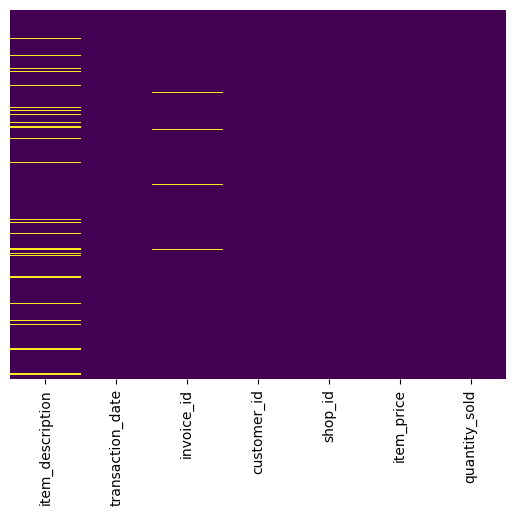

In [5]:
sns.heatmap(df_transactions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
# Encode the target variable 'shop_profile'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_transactions['item_description'] = le.fit_transform(df_transactions['item_description'])

In [7]:
# Use KNN Imputer to Impute the Missing Values 

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_transactions[['item_description']] = imputer.fit_transform(df_transactions[['item_description']])
df_transactions['item_description'] = df_transactions['item_description'].round()

<AxesSubplot:>

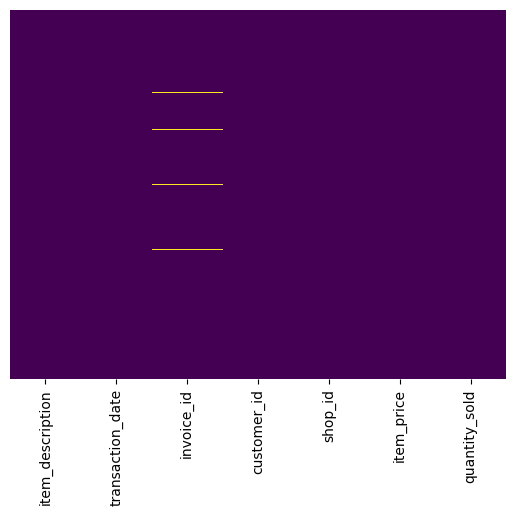

In [8]:
sns.heatmap(df_transactions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df_transactions['item_description'] = df_transactions['item_description'].astype(int)

In [10]:
df_transactions['item_description'] =le.inverse_transform(df_transactions['item_description'])

#df_transactions['item_description'] =  df_transactions['item_description'].fillna("No Product")

## Remove Outliers

<AxesSubplot:xlabel='item_price', ylabel='item_description'>

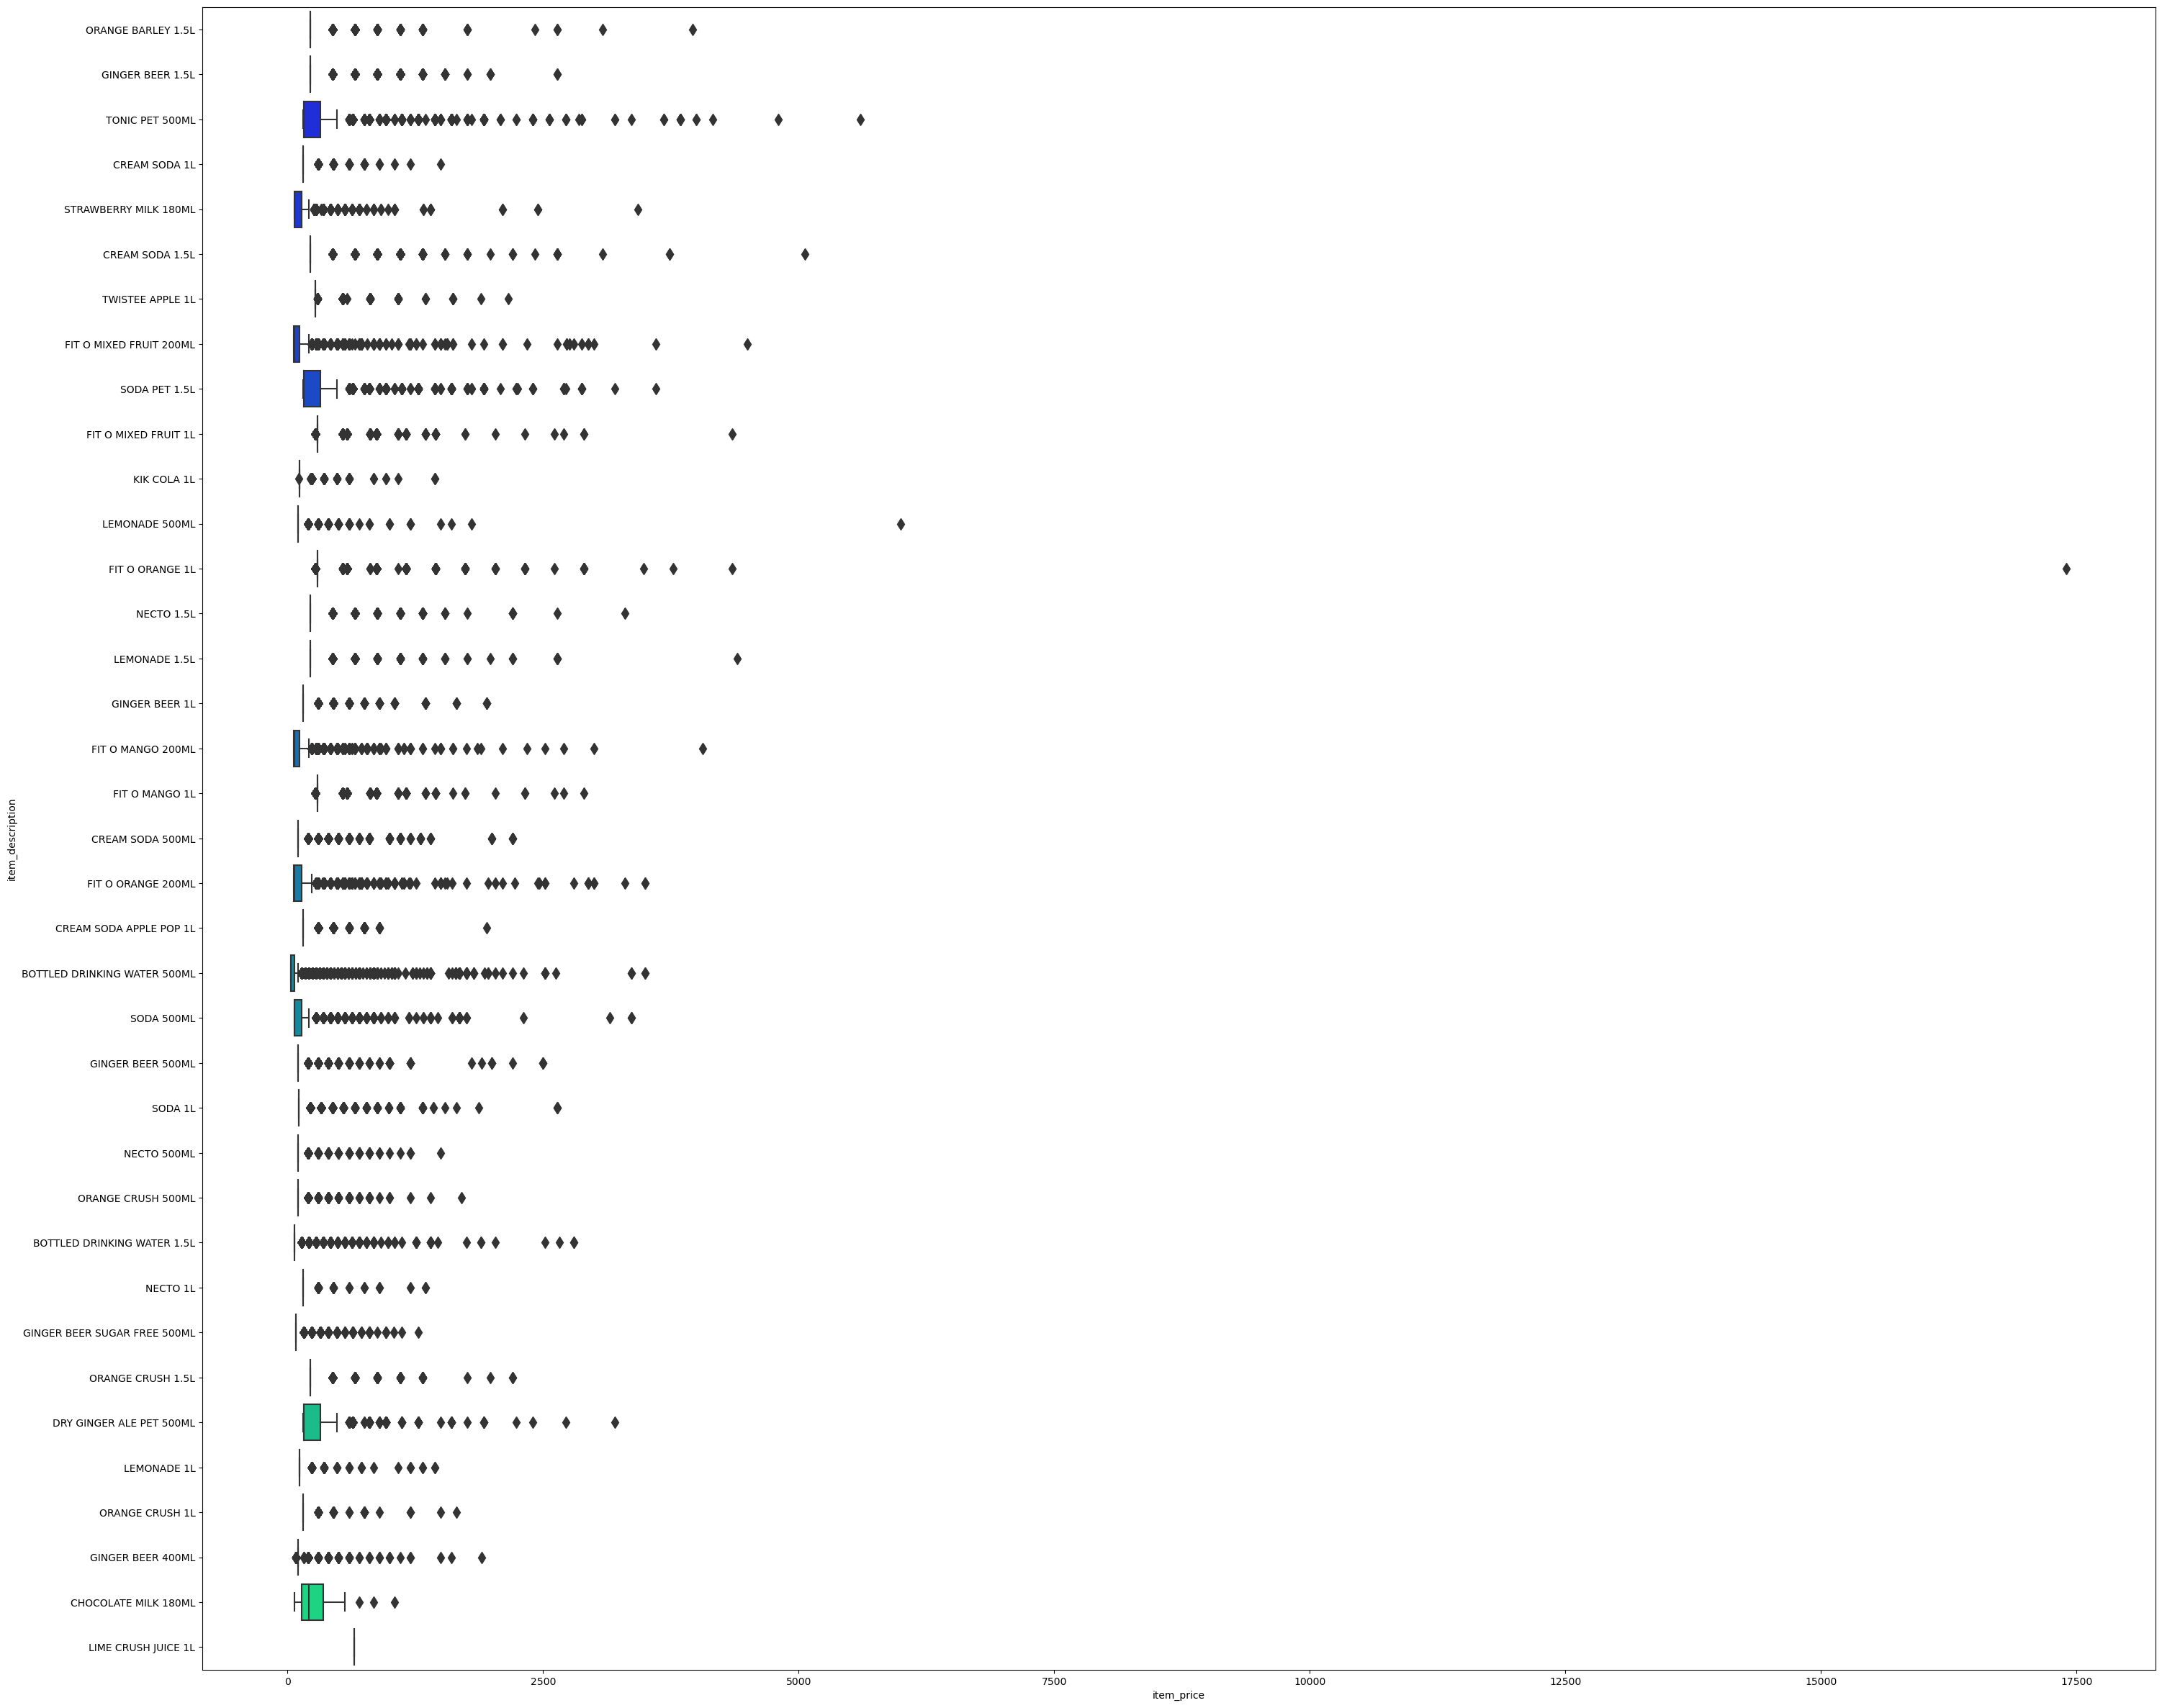

In [11]:
plt.figure(figsize=(35, 30))

sns.boxplot(y='item_description',x = 'item_price',data=df_transactions,palette='winter' ,fliersize=8)

### Item Wise Remove the Outliers Using Capping 

In [12]:
products_list = df_transactions.item_description.unique()
products_list

array(['ORANGE BARLEY 1.5L', 'GINGER BEER 1.5L', 'TONIC PET 500ML',
       'CREAM SODA 1L', 'STRAWBERRY MILK 180ML', 'CREAM SODA 1.5L',
       'TWISTEE APPLE 1L', 'FIT O MIXED FRUIT 200ML', 'SODA PET 1.5L',
       'FIT O MIXED FRUIT 1L', 'KIK COLA 1L', 'LEMONADE 500ML',
       'FIT O ORANGE 1L', 'NECTO 1.5L', 'LEMONADE 1.5L', 'GINGER BEER 1L',
       'FIT O MANGO 200ML', 'FIT O MANGO 1L', 'CREAM SODA 500ML',
       'FIT O ORANGE 200ML', nan, 'CREAM SODA APPLE POP 1L',
       'BOTTLED DRINKING WATER 500ML', 'SODA 500ML', 'GINGER BEER 500ML',
       'SODA 1L', 'NECTO 500ML', 'ORANGE CRUSH 500ML',
       'BOTTLED DRINKING WATER 1.5L', 'NECTO 1L',
       'GINGER BEER SUGAR FREE 500ML', 'ORANGE CRUSH 1.5L',
       'DRY GINGER ALE PET 500ML', 'LEMONADE 1L', 'ORANGE CRUSH 1L',
       'GINGER BEER 400ML', 'CHOCOLATE MILK 180ML', 'LIME CRUSH JUICE 1L'],
      dtype=object)

<AxesSubplot:>

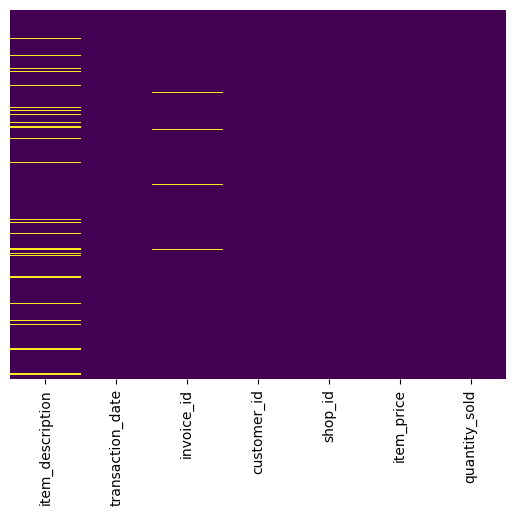

In [13]:
sns.heatmap(df_transactions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='item_price', ylabel='item_description'>

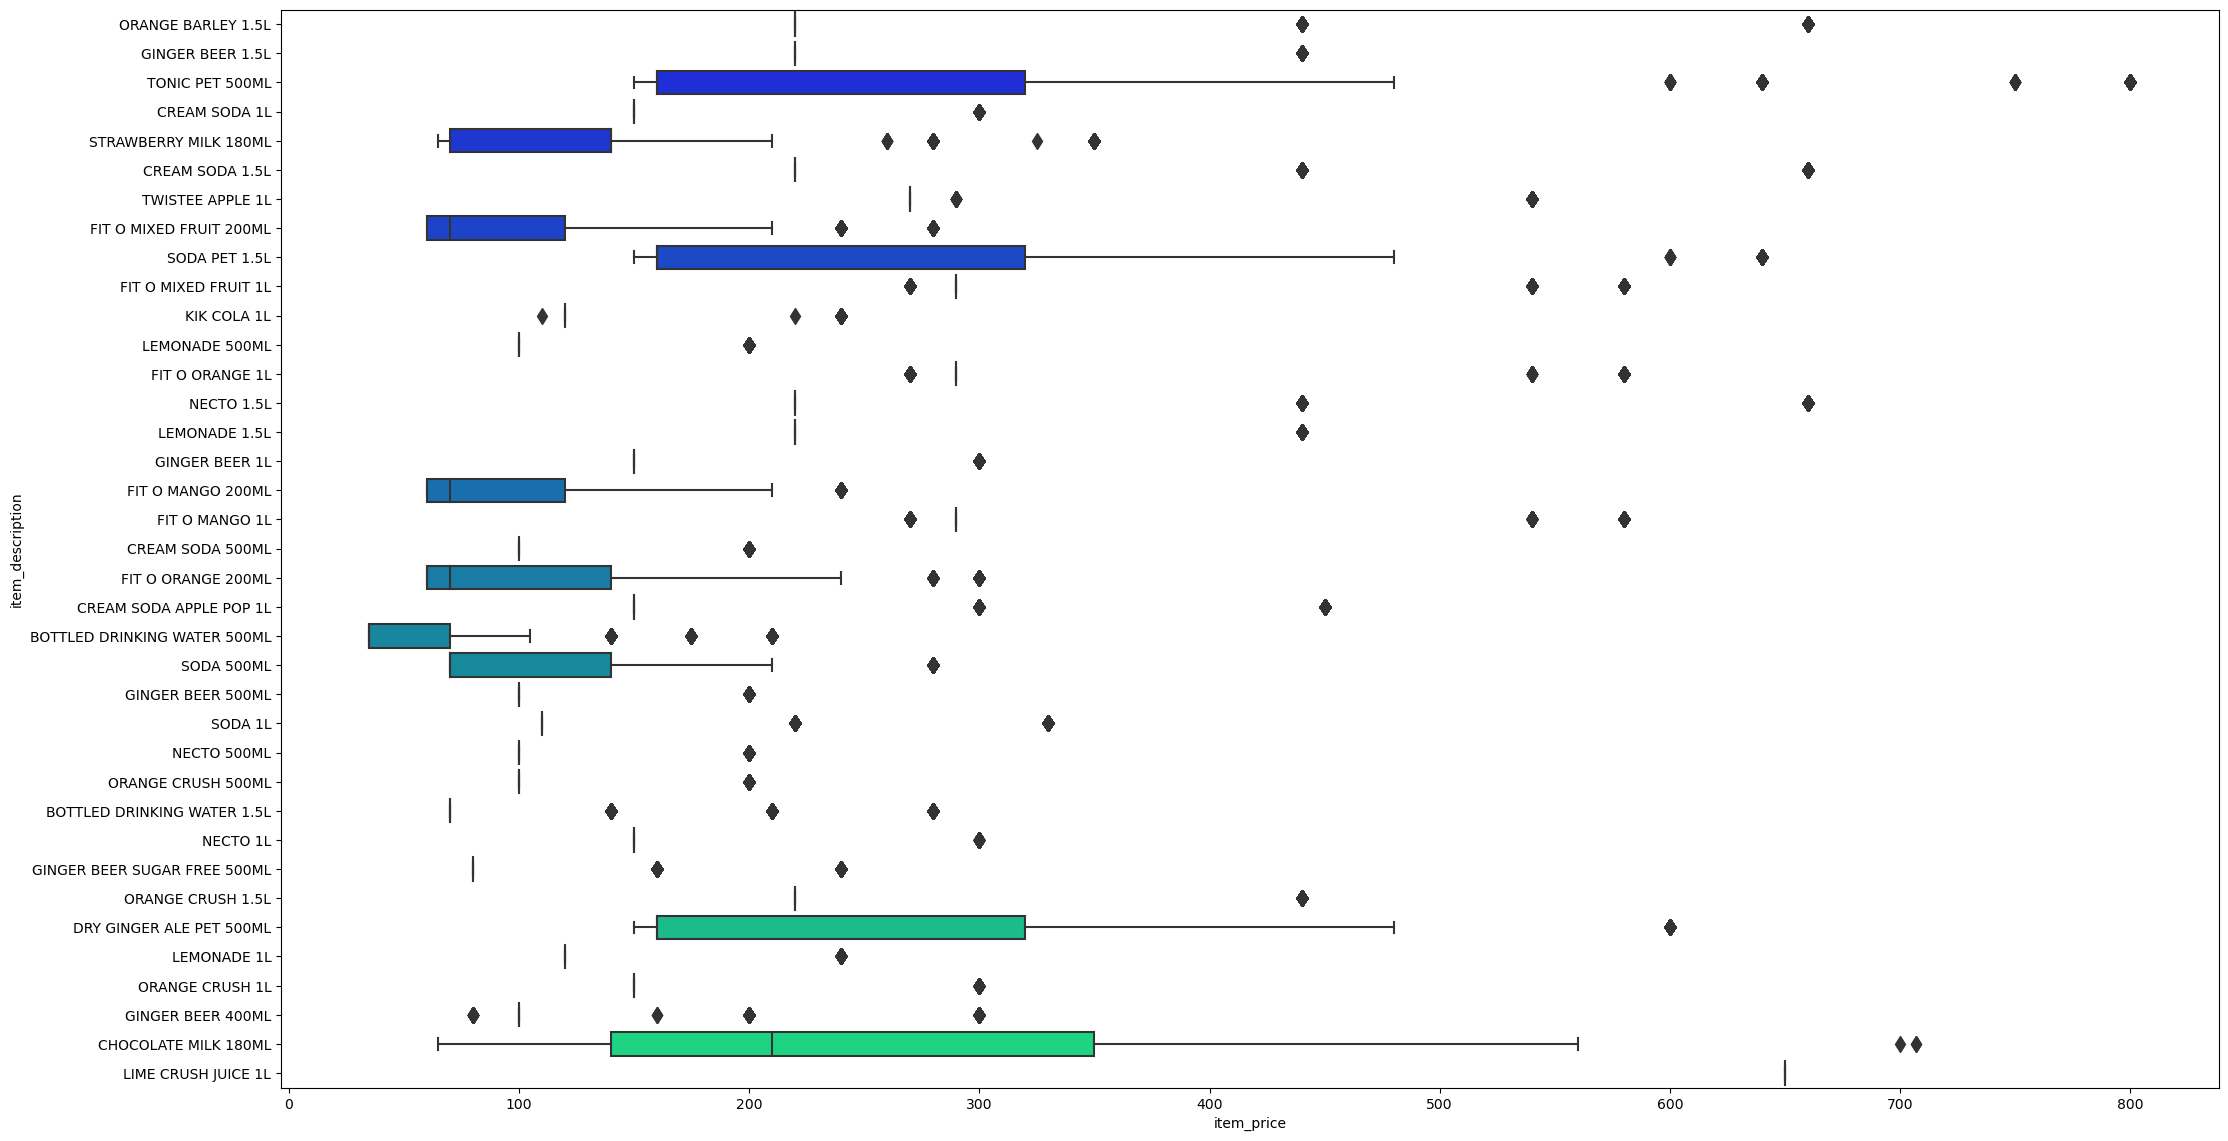

In [14]:
df_test = df_transactions.copy()

for product in products_list:
    df_temp = df_test[df_test['item_description'] == product]
    q95 = df_temp['item_price'].quantile(0.95)
    df_temp['item_price'] = df_temp['item_price'].apply( lambda x: x if x<=q95 else q95 )
    df_test[df_test['item_description'] == product] = df_temp
    
plt.figure(figsize=(25, 14))
sns.boxplot(y='item_description',x = 'item_price',data=df_test,palette='winter' ,fliersize=8)

<AxesSubplot:xlabel='item_price', ylabel='item_description'>

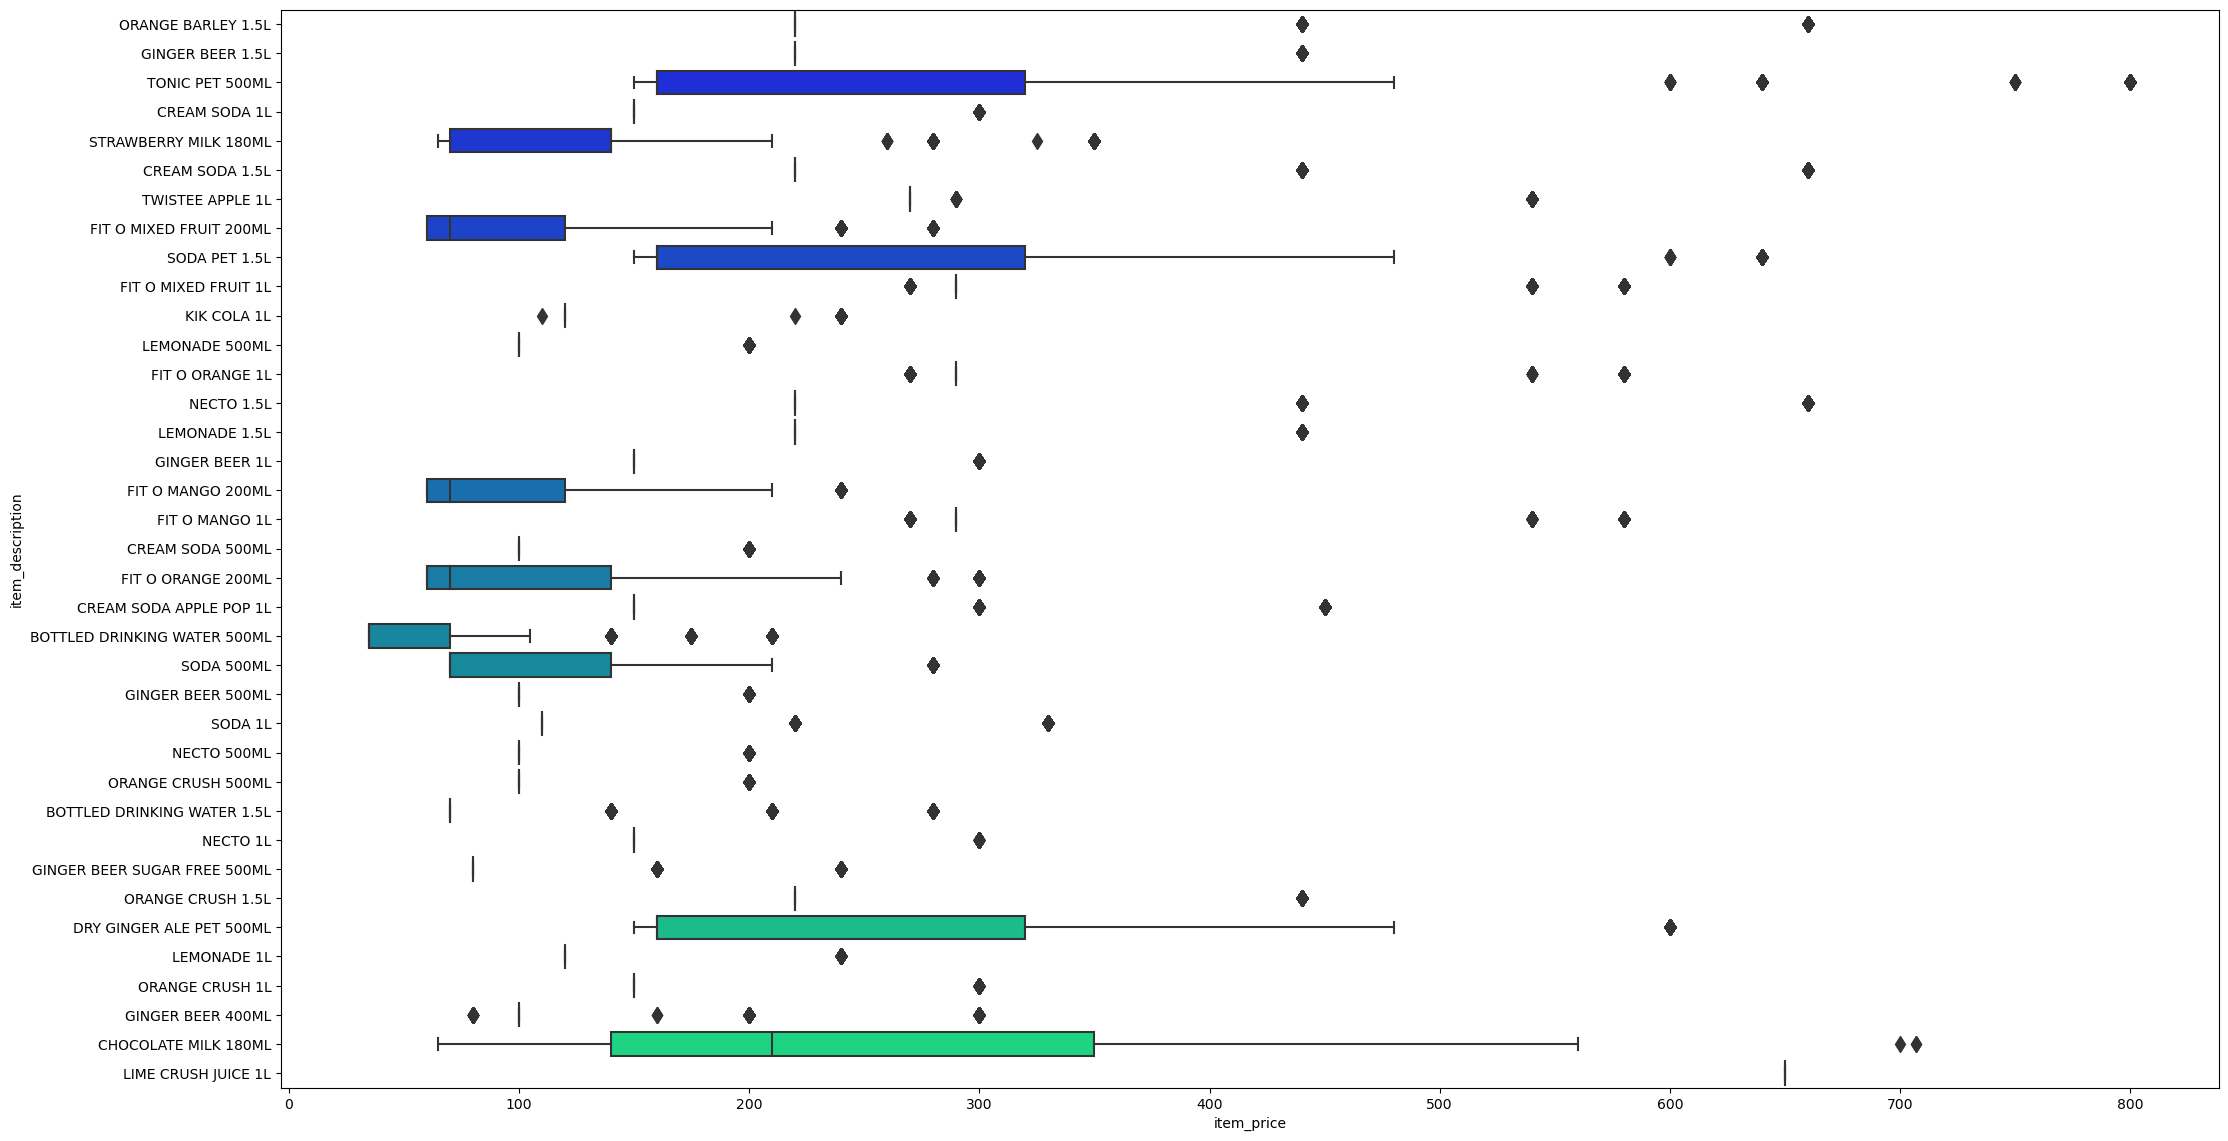

In [15]:
df_transactions = df_test
plt.figure(figsize=(25, 14))
sns.boxplot(y='item_description',x = 'item_price',data=df_transactions,palette='winter' ,fliersize=8)

<AxesSubplot:>

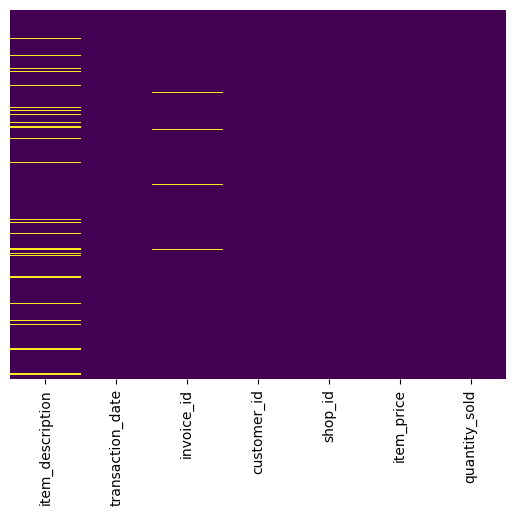

In [16]:
sns.heatmap(df_transactions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='quantity_sold', ylabel='item_description'>

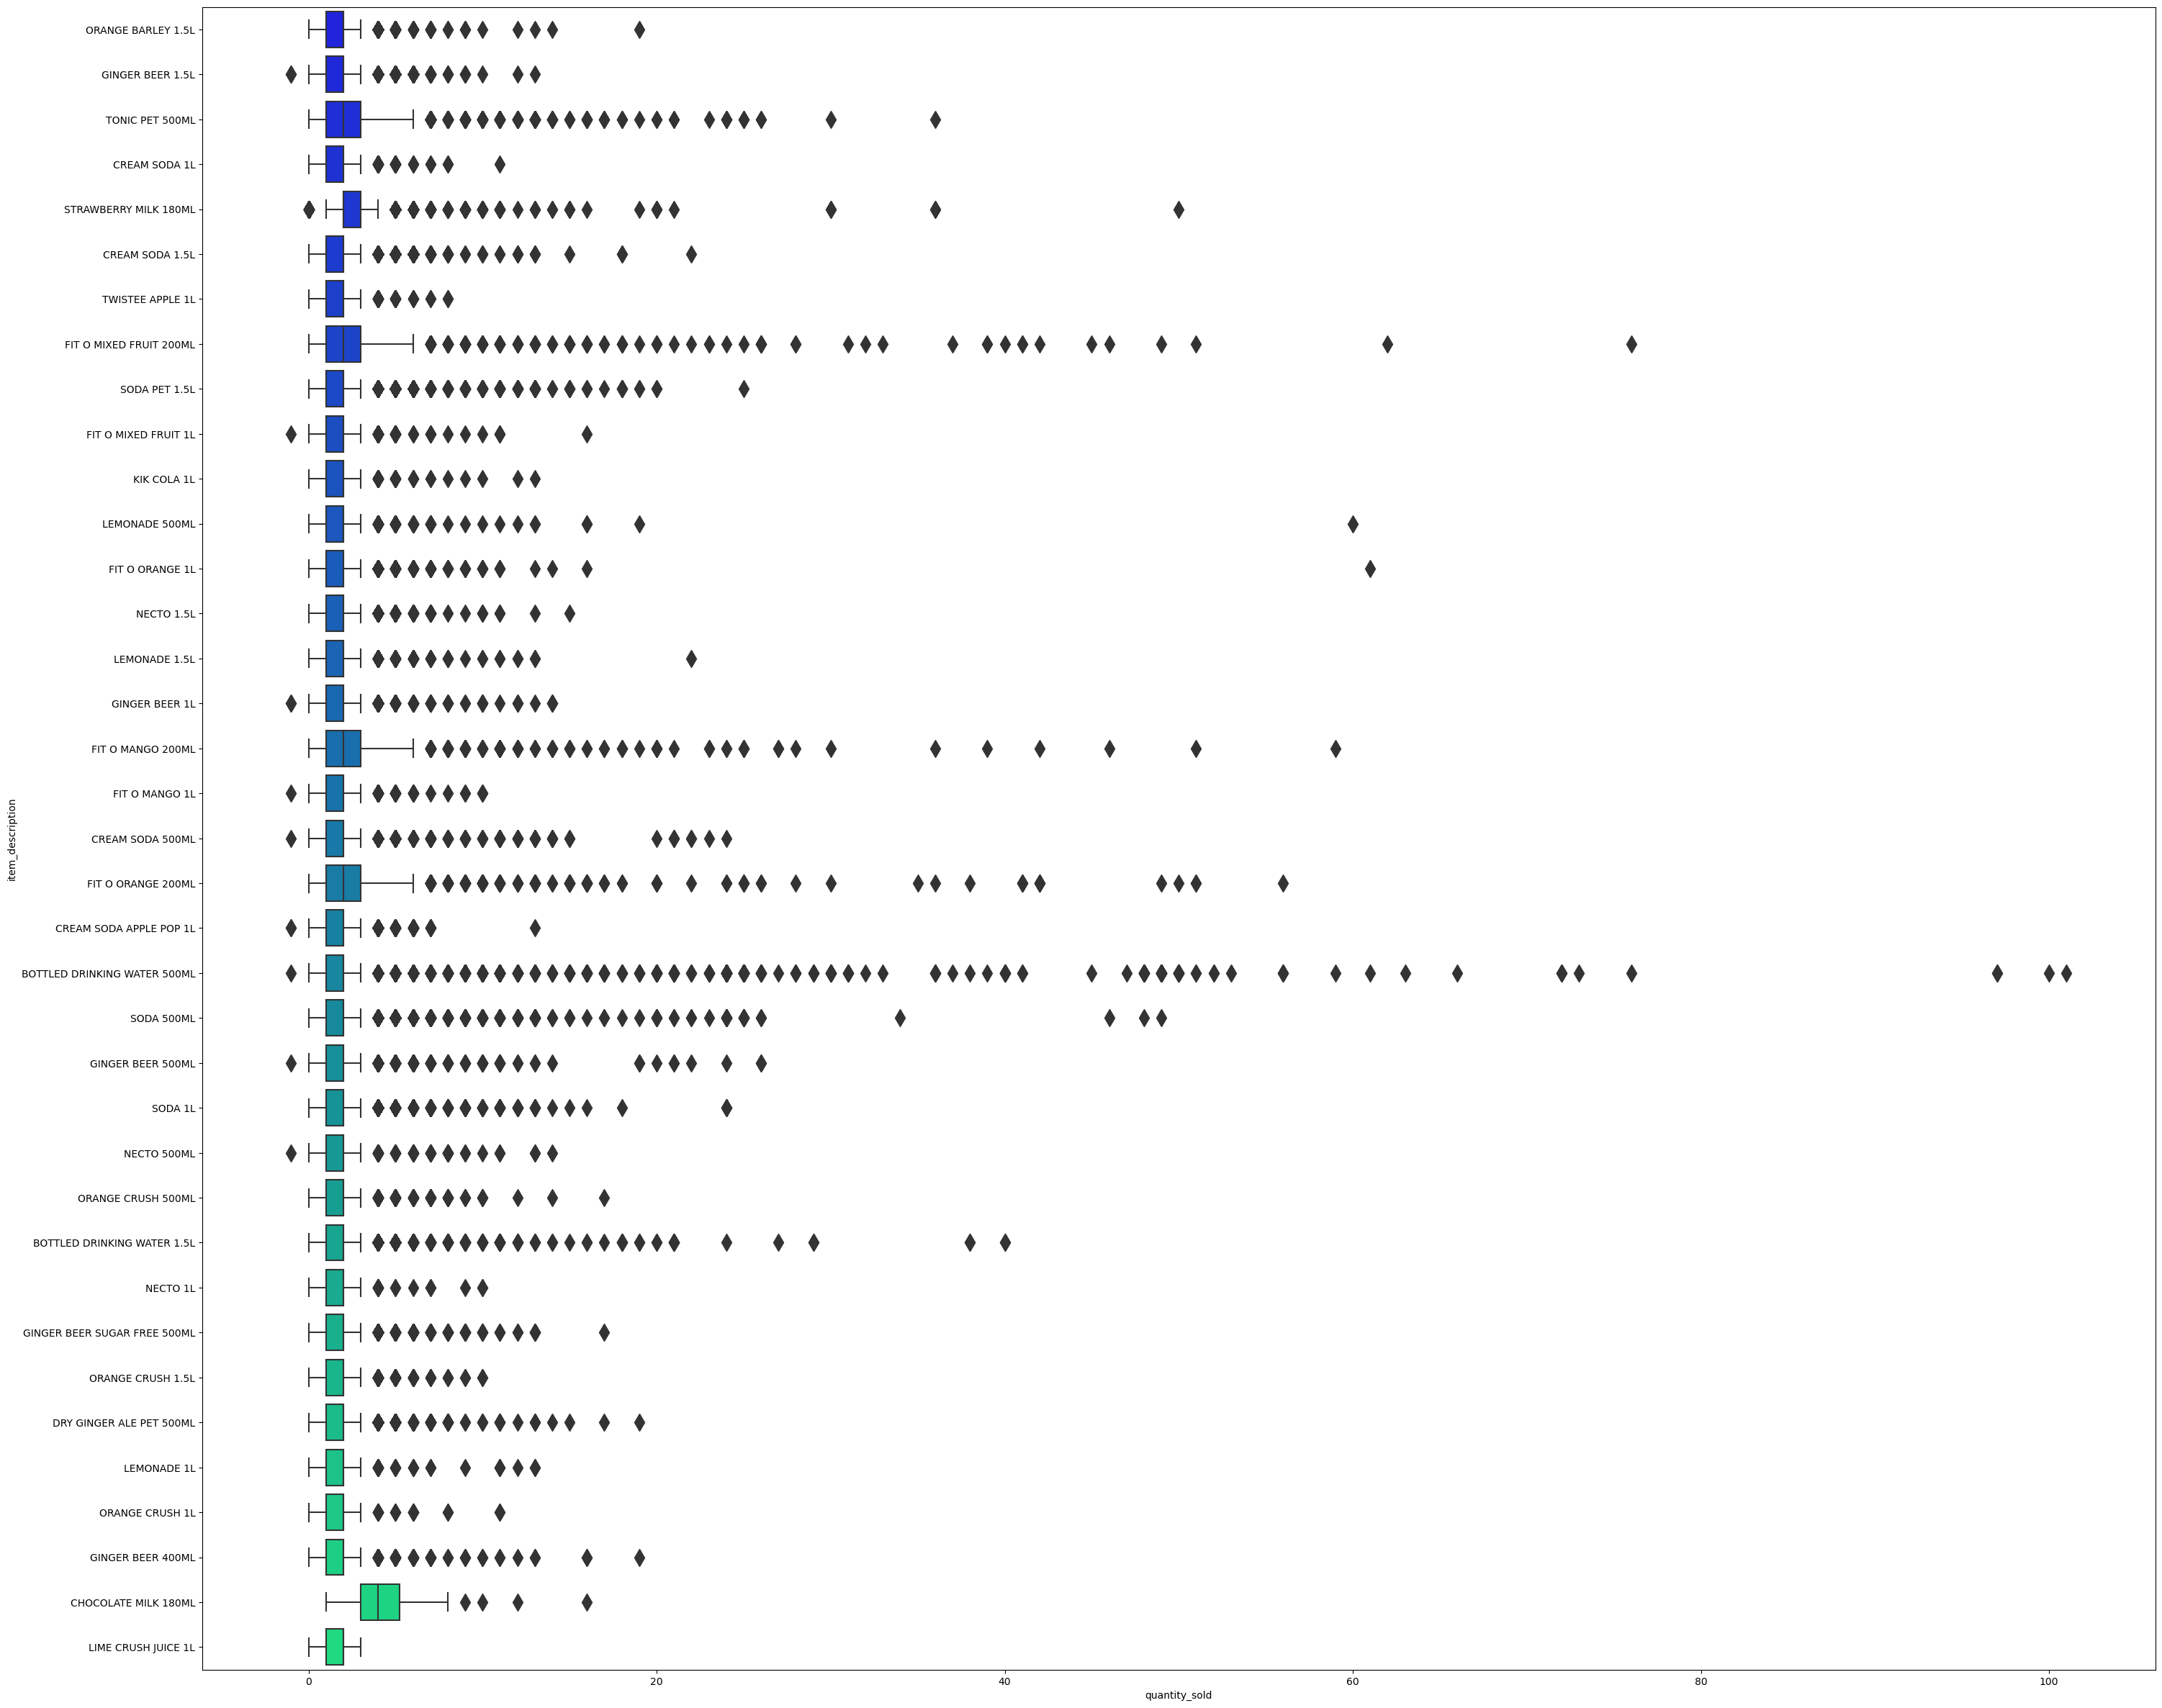

In [17]:
plt.figure(figsize=(35, 30))
sns.boxplot(y='item_description',x='quantity_sold',data=df_transactions,palette='winter' ,  fliersize=12)

In [18]:
## Make the Quantity Sold Ones 0 remove -1 
df_transactions['quantity_sold'] = df_transactions['quantity_sold'].apply( lambda x: x if x>=0 else 0 )

<AxesSubplot:xlabel='quantity_sold', ylabel='item_description'>

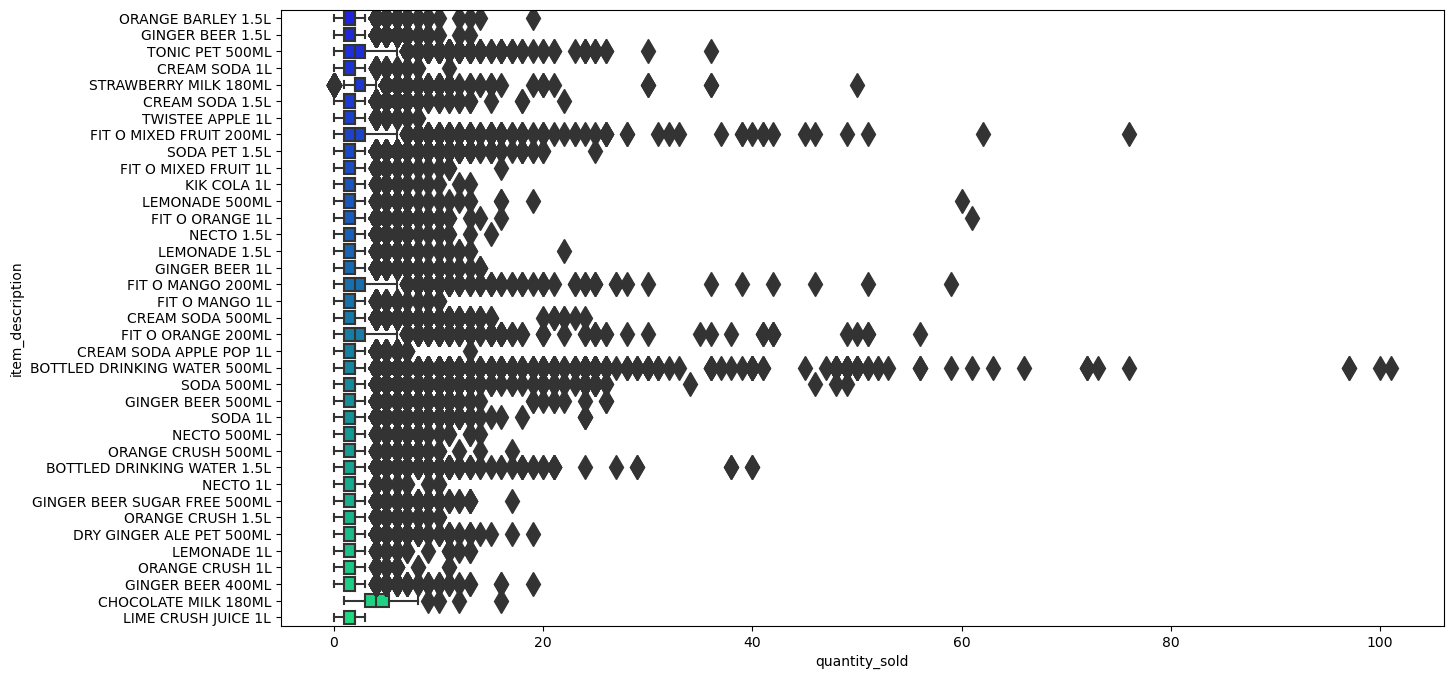

In [19]:
plt.figure(figsize=(15, 8))
sns.boxplot(y='item_description',x='quantity_sold',data=df_transactions,palette='winter',  fliersize=12
           )

<AxesSubplot:>

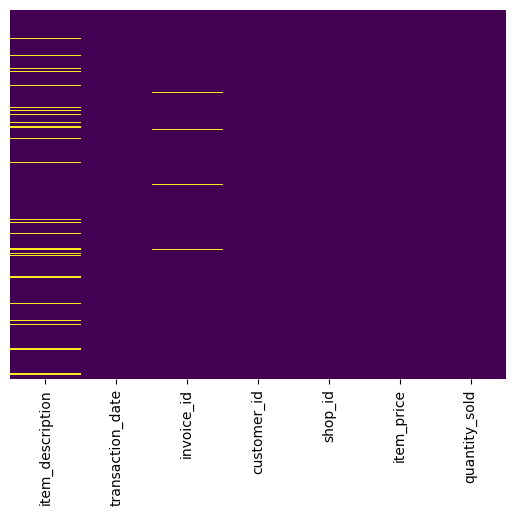

In [20]:
sns.heatmap(df_transactions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
# Convert transaction_date to a datetime object
df_transactions['transaction_date'] = pd.to_datetime(df_transactions['transaction_date'])

# Calculate total sales for each transaction
df_transactions['total_sales'] = df_transactions['item_price'] * df_transactions['quantity_sold']

# Store-level aggregations
store_aggregations = df_transactions.groupby('shop_id').agg({
    'total_sales': 'sum',
    'invoice_id': 'nunique',
    'customer_id': 'nunique',
    'quantity_sold': 'sum',
    'item_description': 'nunique'
}).reset_index()

In [22]:
store_aggregations.columns = ['shop_id', 'total_sales', 'total_transactions', 'total_customers', 'total_items_sold', 'unique_items']

store_aggregations['avg_transaction_value'] = store_aggregations['total_sales'] / store_aggregations['total_transactions']
store_aggregations['avg_items_per_transaction'] = store_aggregations['total_items_sold'] / store_aggregations['total_transactions']

# Merge the aggregated transaction data with df_store_info on the shop_id
store_data = pd.merge(df_store_info, store_aggregations, on='shop_id', how='left')

# Customer-level aggregations (per store)
customer_aggregations = df_transactions.groupby(['shop_id', 'customer_id']).agg({
    'total_sales': 'sum',
    'invoice_id': 'nunique'
}).reset_index()

customer_aggregations['avg_sales_per_customer'] = customer_aggregations['total_sales'] / customer_aggregations['customer_id'].nunique()
customer_aggregations['avg_transactions_per_customer'] = customer_aggregations['invoice_id'] / customer_aggregations['customer_id'].nunique()

customer_aggregations['customer_frequency'] = customer_aggregations.groupby('shop_id')['customer_id'].transform('count') / customer_aggregations['invoice_id']

# Aggregate customer-level data at the store level
customer_aggregations_store = customer_aggregations.groupby('shop_id').agg({
    'avg_sales_per_customer': 'mean',
    'avg_transactions_per_customer': 'mean',
    'customer_frequency': 'mean'
}).reset_index()

In [23]:

# Item-level aggregations (per store)
item_aggregations = df_transactions.groupby(['shop_id', 'item_description']).agg({
    'item_price': 'mean',
    'quantity_sold': 'sum'
}).reset_index()

item_aggregations['item_popularity'] = item_aggregations.groupby('shop_id')['quantity_sold'].rank(ascending=False)

# Aggregate item-level data at the store level
item_aggregations_store = item_aggregations.groupby('shop_id').agg({
    'item_price': 'mean',
    'quantity_sold': 'sum',
    'item_popularity': 'mean'
}).reset_index()

# Time-based aggregations (per store)
daily_sales = df_transactions.groupby(['shop_id', 'transaction_date'])['total_sales'].sum().reset_index()
daily_sales = daily_sales.groupby('shop_id').agg({'total_sales': 'mean'}).reset_index()
daily_sales.columns = ['shop_id', 'avg_daily_sales']

# Merge customer-level, item-level, and time-based aggregations with the store_data dataframe
store_data = pd.merge(store_data, customer_aggregations_store, on='shop_id', how='left')
store_data = pd.merge(store_data, item_aggregations_store, on='shop_id', how='left')
store_data = pd.merge(store_data, daily_sales, on='shop_id', how='left')

# Final input table for the model
final_input_table = store_data.copy()


In [24]:
final_input_table.columns

Index(['shop_id', 'shop_area_sq_ft', 'shop_profile', 'total_sales',
       'total_transactions', 'total_customers', 'total_items_sold',
       'unique_items', 'avg_transaction_value', 'avg_items_per_transaction',
       'avg_sales_per_customer', 'avg_transactions_per_customer',
       'customer_frequency', 'item_price', 'quantity_sold', 'item_popularity',
       'avg_daily_sales'],
      dtype='object')

In [25]:
final_input_table

,shop_id,shop_area_sq_ft,shop_profile,total_sales,total_transactions,total_customers,total_items_sold,unique_items,avg_transaction_value,avg_items_per_transaction,avg_sales_per_customer,avg_transactions_per_customer,customer_frequency,item_price,quantity_sold,item_popularity,avg_daily_sales
0,SHOP047,528,Moderate,729620.0,1302,928,3288,35,560.384025,2.525346,0.004103,0.000007,NaN,177.953697,2848,18.0,11768.064516
1,SHOP009,676,High,1767800.0,3493,2498,8411,35,506.097910,2.407959,0.003693,0.000007,NaN,174.617271,7091,18.0,28512.903226
2,SHOP083,676,Low,1476975.0,2718,1900,6644,36,543.405077,2.444444,0.004056,0.000007,NaN,180.120983,5898,18.5,23822.177419
3,SHOP117,676,Low,2002295.0,3158,2037,8074,35,634.038949,2.556681,0.005129,0.000008,NaN,186.737889,7377,18.0,32295.080645
4,SHOP042,676,Low,1221630.0,2495,1841,5844,35,489.631263,2.342285,0.003463,0.000007,NaN,174.421830,5134,18.0,19703.709677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,SHOP087,527,NaN,922705.0,1504,1083,3750,35,613.500665,2.493351,0.004446,0.000007,NaN,182.605341,3463,18.0,14882.338710
120,SHOP050,411,NaN,2134740.0,3159,1778,7668,31,675.764482,2.427350,0.006265,0.000009,NaN,191.599871,7103,16.0,34431.290323
121,SHOP061,699,NaN,1511050.0,2345,1746,6053,35,644.371002,2.581237,0.004516,0.000007,NaN,184.622637,5730,18.0,24371.774194
122,SHOP056,597,NaN,2584885.0,4320,2832,11165,35,598.353009,2.584491,0.004763,0.000008,NaN,180.263451,9819,18.0,41691.693548


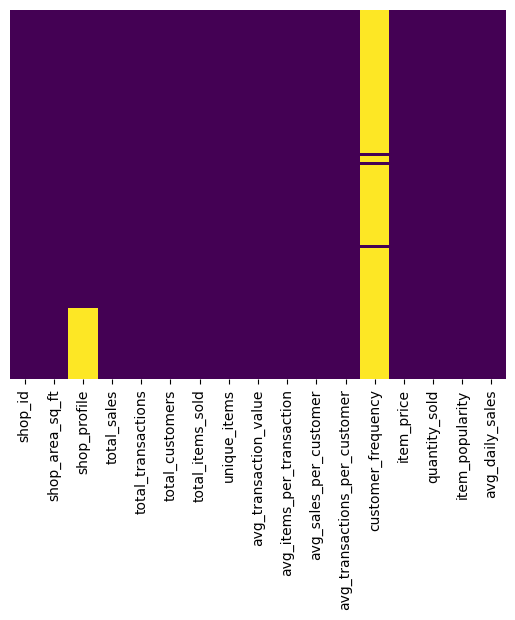

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.heatmap(final_input_table.isnull(),yticklabels=False,cbar=False,cmap='viridis')

final_input_table = final_input_table.drop(['customer_frequency'], axis=1)

<AxesSubplot:>

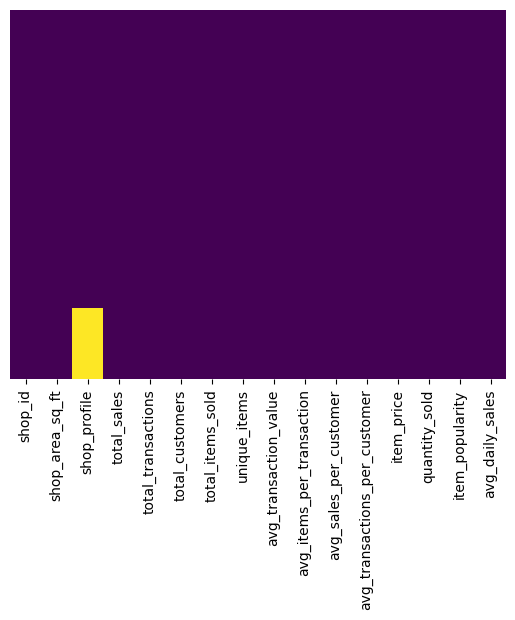

In [27]:
sns.heatmap(final_input_table.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
final_blind_test = final_input_table[final_input_table['shop_profile'].isna()]

final_input_table = final_input_table.dropna()

<AxesSubplot:>

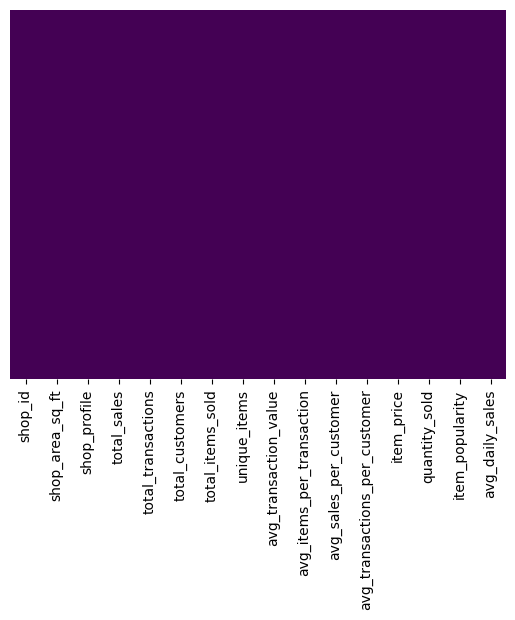

In [29]:
sns.heatmap(final_input_table.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Encode the target variable 'shop_profile'
le = LabelEncoder()
final_input_table['shop_profile_encoded'] = le.fit_transform(final_input_table['shop_profile'])

# Split the data into features (X) and target (y)
X = final_input_table.drop(['shop_id', 'shop_profile', 'shop_profile_encoded'], axis=1)
y = final_input_table['shop_profile_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
model = xgb.XGBClassifier(
    objective='multi:softmax', 
    num_class=len(y.unique()), 
    seed=42,
    n_jobs=-1,
)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.71      0.71      0.71         7
           2       0.50      0.50      0.50         6

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20


Confusion Matrix:
[[4 1 2]
 [1 5 1]
 [2 1 3]]


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 55 to 51
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   shop_area_sq_ft                80 non-null     int64  
 1   total_sales                    80 non-null     float64
 2   total_transactions             80 non-null     int64  
 3   total_customers                80 non-null     int64  
 4   total_items_sold               80 non-null     int64  
 5   unique_items                   80 non-null     int64  
 6   avg_transaction_value          80 non-null     float64
 7   avg_items_per_transaction      80 non-null     float64
 8   avg_sales_per_customer         80 non-null     float64
 9   avg_transactions_per_customer  80 non-null     float64
 10  item_price                     80 non-null     float64
 11  quantity_sold                  80 non-null     int64  
 12  item_popularity                80 non-null     floa

In [32]:
import lightgbm as lgb
import os
fit_params={'verbose': 2,
            "eval_metric" : 'multi_logloss',}


from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={
              'n_estimators': [1500 ],
              'max_depth' : [25 ],
	            'learning_rate ' : [0.05 ],
              'metric' : ['multi_logloss']
             }


import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

cpuCount = os.cpu_count() - 1

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(n_jobs=cpuCount ,boosting_type='gbdt' , objective = 'multiclass' , 
                        num_class = 3,)
gs = GridSearchCV(
    estimator=clf, param_grid=param_test, 
    cv=3,
    refit=True,
    verbose=True)


gs.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))


opt_parameters = gs.best_params_
opt_parameters

#Configure locally from hardcoded values
clf_final = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_final.set_params(**opt_parameters)

#Train the final model with learning rate decay
clf_final.fit(X_train, y_train, **fit_params,)


y_pred_1=clf_final.predict(X_test)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.05


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.05


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.05


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.05
Best score reached: 0.5118708452041786 with params: {'learning_rate ': 0.05, 'max_depth': 25, 'metric': 'multi_logloss', 'n_estimators': 1500} 


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [33]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.83      0.71      0.77         7
           2       0.62      0.83      0.71         6

    accuracy                           0.70        20
   macro avg       0.71      0.71      0.70        20
weighted avg       0.71      0.70      0.70        20



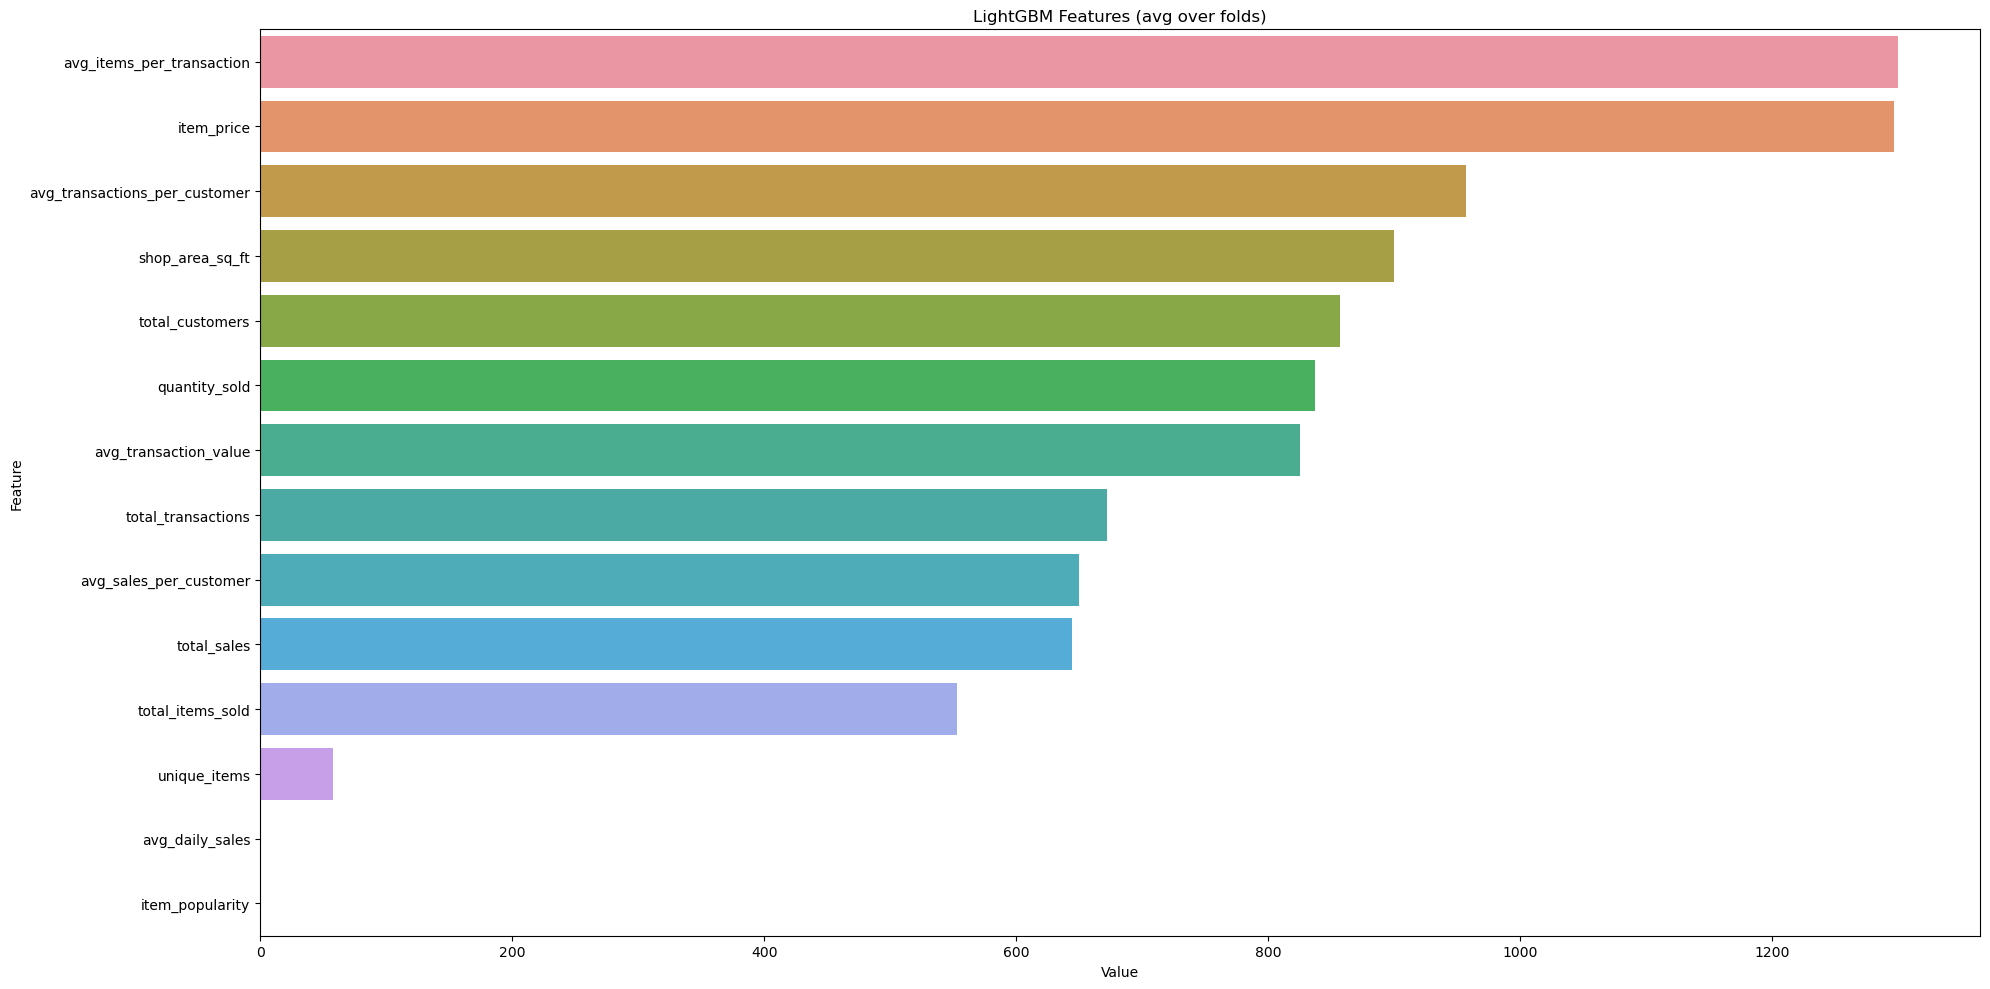

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(clf_final.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [35]:
final_blind_test

,shop_id,shop_area_sq_ft,shop_profile,total_sales,total_transactions,total_customers,total_items_sold,unique_items,avg_transaction_value,avg_items_per_transaction,avg_sales_per_customer,avg_transactions_per_customer,item_price,quantity_sold,item_popularity,avg_daily_sales
100,SHOP046,545,NaN,1729365.0,2735,1736,6941,35,632.308958,2.537843,0.005198,0.000008,186.104271,6555,18.0,27892.983871
101,SHOP024,676,NaN,1151465.0,2302,1641,5274,35,500.201998,2.291051,0.003662,0.000007,173.790297,4785,18.0,18572.016129
102,SHOP023,617,NaN,1965690.0,3138,2227,7946,36,626.414914,2.532186,0.004606,0.000007,180.079564,7026,18.5,31704.677419
103,SHOP097,310,NaN,2242605.0,2436,1669,6934,31,920.609606,2.846470,0.007012,0.000008,191.599684,6049,16.0,36171.048387
104,SHOP044,715,NaN,1189170.0,2082,1552,4965,35,571.167147,2.384726,0.003998,0.000007,177.762189,4458,18.0,19180.161290
105,SHOP030,530,NaN,2185405.0,2779,1637,7687,35,786.399784,2.766103,0.006966,0.000009,191.975362,7121,18.0,35248.467742
106,SHOP038,411,NaN,1274600.0,2597,1781,5728,31,490.797074,2.205622,0.003735,0.000008,176.246294,5376,16.0,20558.064516
107,SHOP029,597,NaN,1673370.0,2875,2052,7352,35,582.041739,2.557217,0.004255,0.000007,181.929430,6487,18.0,26989.838710
108,SHOP096,676,NaN,2262380.0,3739,2497,9049,35,605.076224,2.420166,0.004728,0.000008,179.303799,8083,18.0,36490.000000
109,SHOP092,617,NaN,1610140.0,2946,2247,7266,35,546.551256,2.466395,0.003739,0.000007,174.683577,6251,18.0,25970.000000


In [36]:
X_train.shape

(80, 14)

In [37]:
X_blind_test = final_blind_test.drop(['shop_id', 'shop_profile'], axis=1)
X_blind_test.shape

(24, 14)

In [38]:
y_blind_pred_1=clf_final.predict(X_blind_test)

In [39]:
print(y_blind_pred_1.shape)
y_blind_pred_1
y_blind_pred_1 =le.inverse_transform(y_blind_pred_1)

(24,)


In [40]:
y_blind_pred_1

array(['Moderate', 'Moderate', 'Low', 'High', 'Moderate', 'Moderate',
       'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Moderate', 'High',
       'Moderate', 'Moderate', 'Moderate', 'High', 'Moderate', 'Low',
       'Moderate', 'Moderate', 'Moderate', 'Moderate'], dtype=object)

In [41]:
df_Testing_data = pd.read_csv('/kaggle/input/data-storm-4/Testing-data.csv')
df_Testing_data['shop_profile'] = y_blind_pred_1
df_Testing_data.to_csv(r'/kaggle/working/Testing-data.csv')
df_Testing_data.to_csv('submission.csv', index=False)